# Talktorial 3

# The One-Hot Encoding Concept

#### CADD Seminar 2020, AG Volkamer, Charité/FU Berlin 

#### SAKSHI MISRA

Berlin,25 May 2020

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Aim of this talkatorial

The aim of the talkatorial is to perform One Hot Encoding using various different implementation on ChEMBL dataset to achieve more understanding on the One Hot Encoding Concept and why it is useful as a pre-processing step in various Machine Learning algorithm.

<img src="./images/logo.png" width="300" align='center'>

# Learning goals


## Theory

* ChEMBL database
* SMILES structures
    - Canonical Smiles
* What is Categorical Data?
    - What is the Problem with Categorical Data?
    - How to Convert Categorical Data to Numerical Data?
* One Hot Encoding Concept
    - Why Use a One Hot Encoding?
    - Example
    - Advantages of Using One Hot Encoding
    - Disadvantages of Using One Hot Encoding
* Other similar Transformation
    - Integer Encoding (Label Encoder)
    - Example
* Differences between Label and One Hot Encoding
* Further Readings


## Practical

* Import necessary packages
* Load and draw molecules
* Apply One Hot encoding using own implementation
  - Visualization of One Hot Encoded Matrix using Own Implementation (unequal dimension)
* Function defined to Preprocess the Data
* Apply One Hot encoding using own implementation on Preprocessed Data
  - Visualization of One Hot Encoded Matrix using Own Implementation (equal dimension)
* Apply One Hot encoding using implementation in [Scikit-learn](https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
  - Visualization of One Hot Encoded Matrix uisng Scikit-learn implementation
* Apply One Hot encoding using implementation in [keras](https://keras.io/)
  - Visualization of One Hot Encoded Matrix using keras implementation
 


# References

- Theoretical Background:
     - Example using OneHotEncoder function from Scikit Learn (https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

- Packages used:
     -  rdkit (https://www.rdkit.org/docs/GettingStartedInPython.html)
     - Scikit-learn (https://scikit-learn.org/stable/)
     - keras (https://keras.io/)
     - Matplotlib (https://matplotlib.org/)
- Smiles Encoder function (https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/)

- Images used:
     - Figure 1- One Hot Encdoing of Touelene ()
     - Figure 2- One hot Encoding example (https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39)
     - Figure 3- Label encoding example  (https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd)



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Theory

## ChEMBL database

[ChEMBL](https://www.ebi.ac.uk/chembl/) is an open large-scale bioactivity database


## SMILES structures
[SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) (Simplified Molecular Input Line Entry System) notation is a chemical notation that allows a user to represent a chemical structure in a linear way that can be used by the computer.

 > ### Canonical Smiles

--- 

## What is Categorical Data?
Categorical data are variables that contain label values rather than numeric values.
Some examples include:

- A “pet” variable with the values: “dog” and “cat“.
- A “color” variable with the values: “red“, “green” and “blue“.
- A “place” variable with the values: “first”, “second” and “third“.

Talking about in terms of bioinformatics, if we are using Machine learning Classifier to classify Cancerous and Normal Tissues cells, we can have label values say "Lung Cancer", "Breast Cancer", "Liver Cancer" and "Healthy Controls".
We first need to One Hot Encode these Categorical label values and then we can apply Binary or Multi-Class Classifier to achieve classification results.

> ### What is the Problem with Categorical Data?
Machine Learning is, after all, a bunch of mathematical operations translated to a computer via low-level programming languages.Computers are brilliant when dealing with numbers. So, we must somehow convert our input data to numbers. 
There are many machine learning algorithms which cannot operate on categorical data directly so they must be converted to a numerical form. They require all input variables and output variables to be numeric.

> ### How to Convert Categorical Data to Numerical Data?
There are many ways to convert categorical values into numerical values.Each approach has its own positive and negative impact on the feature set. Hereby, I would be focussing on 2 main methods: `One-Hot-Encoding` and `Label-Encoder`.
Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

---

## One Hot Encoding Concept
One hot encoding is a vector representation where all the elements of the vector are 0 except one, which has 1 as its value. For example, [0 0 0 1 0 0] is a one-hot vector.
Simply, One hot encoding also known as Binary encdoing, is a binary representation of categorical variables as binary vectors.

Example shown here represents Toluene structure, its SMILES representation and how One Hot Encoding can be done with the SMILES structure

<div style="text-align: center;">
    <img src="images/OneHotEncoding.png" style="max-width: 800px; width:200%;" />
</div>
 
*Figure 1:* Visual demonstration of how one can encode SMILES strings.

Lets take a deeper look into the concept with the help of a simple example that will describe the basic concept One Hot Encoding, why it is useful and how one can approach towards it.

> ### Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.
Its difficult for many machine learning algorithms to work with categorical data directly that's why the label values which are categorical must be converted into numbers first as a preprocessing step. This is required for both input and output variables that are categorical.
We could use an integer encoding directly. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.
There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat

> ### Example
Lets take a look at a very simple example to understand this concept.
Lets assume we have the “color” variable which has three labels, `RED` , `YELLOW` and `GREEN`.
All these labels must be converted into numeric form in order to work with our Machine Lerning algorithm, this can be done by creating three new columns having all the three labels and use “1” value for the color and “0” values for the other colors.


<div style="text-align: center;">
    <img src="images/OneHotEncoding_eg.png" style="max-width: 700px; width:150%;" />
</div>

*Figure 2:* Visual demonstration of Simple example.




> ###  Advantages of Using One Hot Encoding 
-  Machine Learning Algorithms are applicable (The major advantage of using One Hot Encoding is that we can apply all the types of Machine Learning algorithm to our dataset and analyse it further)
-  Binary representation (We can create binary representation of our label values)


> ###  Disadvantages of Using One Hot Encoding 
-  Increase dimensionality (After adding several columns based on variables, the dataset will be having more dimensions than before and in result it can increase the computational cost)
-  Increase [Sparsity](https://en.wikipedia.org/wiki/Sparse_matrix) (sparse array is a matrix in which most of the elements are zero, One Hot Encoding will increase the sparsity of our dataset)

---

## Other similar Transformation

### Integer Encoding (Label Encoder)

This is called a label encoding or an integer encoding and is easily reversible.
[Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is also a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering, so that machines can work with it properly.
Machine learning algorithms can then decide in a better way on how labels must be operated. 
It is an important preprocessing step for the structured dataset in supervised learning.

> ### Example
For example as shown below, for a variable like color we can assign “red” as 1, “green” as 2, and “yellow” as 3.


![OneHotEncoding Example](images/label_encoding_example.png)

*Figure 3:* Visual demonstration of Simple example.

> ### Advantages of Using Label Encoding

---


## Difference between Label and One Hot Encoding




--- 

## Further Readings

This section lists some resources for further reading

- [What is one hot encoding and when is it used in data science?](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)
- [Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd#:~:text=One%2DHot%20Encoding%20in%20Python&text=OneHotEncoder%20from%20SciKit%20library%20only,apply%20OneHotEncoder%20on%20column%20Bridge_Types_Cat.)
- [How one can use matplotlib.pyplot.imshow() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Practical

## Imports

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
print('All packages are installed successfully')

Using TensorFlow backend.


All packages are installed successfully


In [2]:
# extension used to solve lint errors
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Load and draw molecules

Using `Pandas` library, we will first load the data from the [GitHub data repository](https://github.com/volkamerlab/CADDSeminar_2020/blob/master/data/CHEMBL25_activities_EGFR.csv) and then we can draw the molecules using `rdkit.draw` function.
Finally we can apply different implementations of `One Hot Encoding` into the SMILES structures.

Let's load the data and quickly analyze it's columns and values, also if there is any missing values:

In [4]:
# Load data using absolute path
df = pd.read_csv('../../data/CHEMBL25_activities_EGFR.csv',
                 lineterminator='\n', index_col=0)

In [5]:
# below command used to remove warnings
pd.options.mode.chained_assignment = None

In [6]:
# Check the dimension of the data
print(df.shape)

(3906, 5)


In [7]:
# Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 1777 to 2783
Data columns (total 5 columns):
chembl_id           3906 non-null object
IC50                3906 non-null float64
units               3906 non-null object
canonical_smiles    3906 non-null object
              3906 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.1+ KB


In [8]:
# Visualizing the dataframe
df.head()

,chembl_id,IC50,units,canonical_smiles,pIC50
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


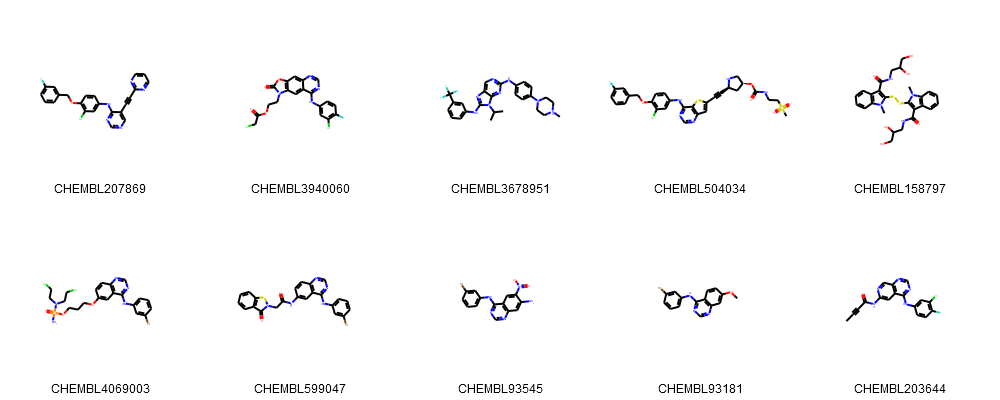

In [9]:
# Using pandas tools and Draw method we can visualize our molecules
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles')
Draw.MolsToGridImage(list(df.ROMol[0:10]),
                     legends=list(df.chembl_id[0:20]), molsPerRow=5)

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,

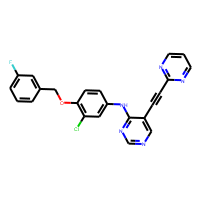
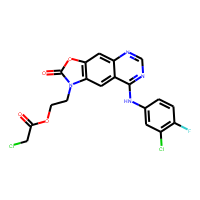
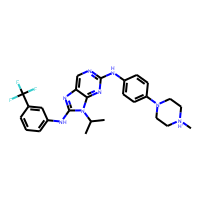
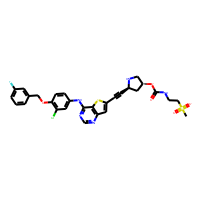
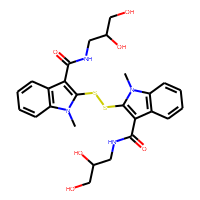

In [10]:
# Renaming column name ROMol to 2D_Figure to get the proper idea of the column
df = df.rename(columns={'ROMol': '2D_Figures'})
df.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Apply One Hot encoding using own implementation

Create One Hot Encoded Matrix using function [`smiles_encoder`](https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/) function.

In [11]:
# Creating a new column for Encoded values of smiles
df['Own_OneHotEncoding'] = ""

In [12]:
# Create dataset of all possible Smiles Characters
SMILES_CHARS = [' ', '#', '%', '(',
                ')', '+', '-', '.', '/', '0', '1', '2', '3',
                '4', '5', '6', '7', '8', '9',
                '=', '@', 'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M',
                'N', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']', 'a', 'b', 'c', 'e', 'g', 'i',
                'l', 'n', 'o', 'p', 'r', 's', 't', 'u']
# Convert the dataset into dictionary
smi2index = dict((c, i)for i, c in enumerate(SMILES_CHARS))


def smiles_encoder(smiles, maxlen):
    """Function defined using all unique characters in our
    Processed Canonical Smiles structures created
    from preprocessed function.
    Parameters
    ----------
          smiles(string): smile data in string
          maxlen(int): max length
    Returns
    -------
          ndarray: return matrix
    """
    smilesMatrix = np.zeros((len(SMILES_CHARS), maxlen), dtype=int)
    for i, c in enumerate(smiles, 0):
        smilesMatrix[smi2index[c], i] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures,Own_OneHotEncoding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."

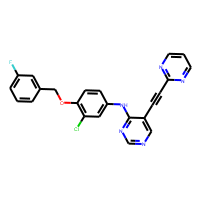
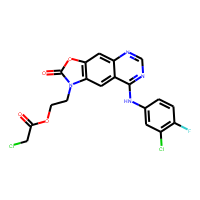
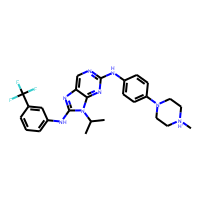
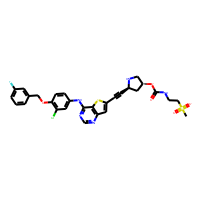
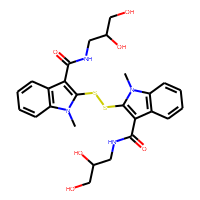

In [13]:
# for loop to iterate over all the smiles in the
# dataframe and apply the  function
from timeit import default_timer as timer
start = timer()
for i in range(0, 3906):
    strings = df['canonical_smiles'].iloc[i]
    df['Own_OneHotEncoding'].iloc[i] = smiles_encoder(strings, len(strings))
end = timer()
df.head()

In [14]:
smiles_encoder_Time = end - start

In [15]:
print(str(smiles_encoder_Time) + ' secs')

3.1635500000000008 secs


### Visualization with Matplotlib.imshow() function of One Hot Encoded Matrix using Own Implementation (unequal dimension)

`Matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension NumPy. `Pyplot` is a state-based interface to a Matplotlib module which provides a MATLAB-like interface.
The [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

Now we can visualize our One Hot encoded strings using imshow() function as described above.

In [16]:
# First element of one hot encoded array
First_one_hot_encoded_matrix = df.iloc[0]['Own_OneHotEncoding']

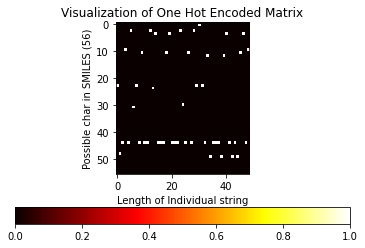

In [17]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Length of Individual string')
plt.ylabel('Possible char in SMILES (56)')
plt.title('Visualization of One Hot Encoded Matrix')
# plt.axis('auto')
plt.show()

In [18]:
# check the type of matrix array
type(First_one_hot_encoded_matrix)

numpy.ndarray

In [19]:
# Dimension of the First_one_hot_encoded_matrix
First_one_hot_encoded_matrix.shape

(56, 49)

In [20]:
# Next element of one hot encoded array
Next_one_hot_encoded_matrix = df.iloc[1]['Own_OneHotEncoding']

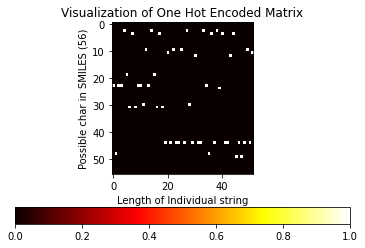

In [21]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(Next_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Length of Individual string')
plt.ylabel('Possible char in SMILES (56)')
plt.title('Visualization of One Hot Encoded Matrix')
# plt.axis('auto')
plt.show()

In [22]:
# Dimension of the Second OneHotEncoded_matrix
Next_one_hot_encoded_matrix.shape

(56, 52)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Function defined to Preprocess the Data


- As we have noticed from above visualizations, that all the SMILES strings have unequal dimension, so its better to make the dimension equal for all the SMILES strings for later use, in order to do that first, we searched for the string with Max Length using [len()](https://www.geeksforgeeks.org/python-string-length-len/) method 
- By implementing the above code, we can get the max length of the SMILES strings and pass that an argument in our function for all the strings.



- In the above function, we have created a dataset of 56 possible smiles characters, but to optimize our one hot encoding, we  reconsidered using all the 56 characters.
- We can assume that all the characters won't be present in our SMILES structures, so we looked for all the unique characters present in the SMILES.
- Also I would like to point out that many elements in our periodic table has two alphabets in their name for example 'Cl(Chloride)' and thats commonly present in out SMILES structure but if we use the above function then we will be splitting Cl into two characters 'C' and 'l' and that would lead to discrepancies, so searching this way for each unique characters and encoding them may not be the best possible way.
- We tried searching for all the two alphabetic element in our SMILES by comparing from all the possible elements present in the periodic table and replaced all the two alphabetic element with one character, for example 'Cl' changed to 'L'.

In [23]:
# Create function used to preprocessed the data
def PreprocessingData(df):
    """Function defined which is used to preprocess the SMILES structures.
    Parameters
    -----------
         df: dataframe which requires preprocessing
    Returns
    --------
         df: dataframe with new Processed_canonical_smiles column
         unique_char: unique character list
         max_len: maximum length of strings of canonical_smiles column
    """
    max_len = df["canonical_smiles"].str.len().max()
    unique_char = set(df.canonical_smiles.apply(list).sum())
    upper_chars = ['C', 'O', 'F', 'P', 'N', 'S', 'H', 'B', 'I']
    lower_chars = ['l', 'o', 'r', 'n', 'e', 'c', 's']
    Periodic_Elements = ['Ac',
                         'Al', 'Am', 'Sb', 'Ar', 'As', 'At', 'Ba',
                         'Bk', 'Be', 'Bi', 'Bh', 'B', 'Br', 'Cd', 'Ca',
                         'Cf', 'C', 'Ce', 'Cs', 'Cl', 'Cr', 'Co', 'Cn',
                         'Cu', 'Cm', 'Ds', 'Db', 'Dy', 'Es', 'Er', 'Eu',
                         'Fm', 'Fl', 'F', 'Fr', 'Gd', 'Ga', 'Ge', 'Au',
                         'Hf', 'Hs', 'He', 'Ho', 'H', 'In', 'I', 'Ir',
                         'Fe', 'Kr', 'La', 'Lr', 'Pb', 'Li', 'Lv',
                         'Lu', 'Mg', 'Mn', 'Mt', 'Md', 'Hg', 'Mo',
                         'Mc', 'Nd', 'Ne', 'Np', 'Ni', 'Nh', 'Nb',
                         'N', 'No', 'Og', 'Os', 'O', 'Pd', 'P',
                         'Pt', 'Pu', 'Po', 'K', 'Pr', 'Pm', 'Pa',
                         'Ra', 'Rn', 'Re', 'Rh', 'Rg', 'Rb', 'Ru', 'Rf',
                         'Sm', 'Sc', 'Sg', 'Se', 'Si', 'Ag', 'Na',
                         'Sr', 'S', 'Ta', 'Tc', 'Te', 'Ts', 'Tb', 'Tl', 'Th',
                         'Tm', 'Sn',
                         'Ti', 'W', 'U', 'V', 'Xe', 'Yb', 'Y', 'Zn', 'Zr']
    A = []
    for upper in upper_chars:
        for lower in lower_chars:
            ch = upper + lower
            if(ch in Periodic_Elements):
                A.append(ch)
    trial = set()
    for x in A:
        for i in range(0, 3906):
            if(df['canonical_smiles'].iloc[i].find(x) != -1):
                trial.add(x)
        df['Processed_canonical_smiles'] = ""
        for i in range(0, 3906):
            element = df['canonical_smiles'].iloc[i]
            element = element.replace("Cl", "L")
            element = element.replace("Br", "R")
            element = element.replace("Cn", "X")
            element = element.replace("Se", "Z")
            element = element.replace("@@", "$")
            df['Processed_canonical_smiles'].iloc[i] = element
        unique_char = set(df.Processed_canonical_smiles.apply(list).sum())
        return unique_char, df, max_len

## Apply One Hot encoding using Own implementation on Preprocessed Data


In [24]:
# Create new column which has one hot encoded smiles using unique characters
df['UniqueChar_OneHotEncoding'] = ""
# Calling function
unique_char, df, max_len = PreprocessingData(df)

In [25]:
# create dictionary of the unique char datset
smi2index = dict((c, i) for i, c in enumerate(unique_char))


def smiles_encoder(smiles, maxlen):
    """Function defined using all unique characters in our
    Processed Canonical Smiles structures created
    from preprocessed function.
    Parameters
    ----------
        smiles(string): smile data in string
        maxlen(int): max length
    Returns
    -------
        ndarray: return matrix
    """
    smilesMatrix = np.zeros((len(unique_char), maxlen))
    for i, c in enumerate(smiles, 0):
        smilesMatrix[smi2index[c], i] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...

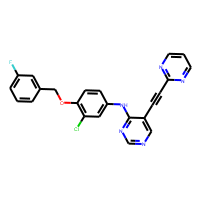
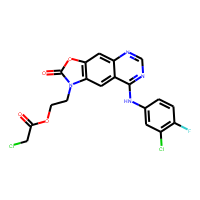
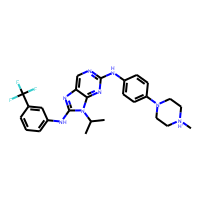
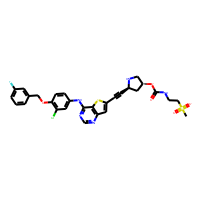
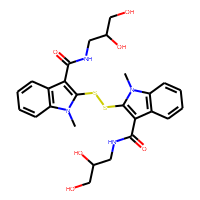

In [26]:
# for loop to iterate over all the smiles in the
# dataframe and apply the  function
start = timer()
for i in range(0, 3906):
    strings = df['Processed_canonical_smiles'].iloc[i]
    df['UniqueChar_OneHotEncoding'].iloc[i] = smiles_encoder(strings, max_len)
end = timer()
df.head()

In [27]:
smiles_encoder_eqDimen = end - start
print(str(smiles_encoder_eqDimen) + ' secs')

3.6564178 secs


### Visualization with Matplotlib.imshow() function of One Hot Encoded Matrix using Own Implementation (equal dimension) 

In [28]:
# First element of one hot encoded array
First_one_hot_encoded_matrix = df.iloc[0]['UniqueChar_OneHotEncoding']

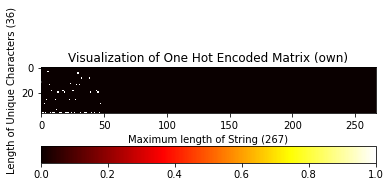

In [29]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (36)')
plt.title('Visualization of One Hot Encoded Matrix (own)')
# plt.axis('auto')
plt.show()

In [30]:
# Dimension of the First OneHotEncoded_matrix
First_one_hot_encoded_matrix.shape

(37, 267)

In [31]:
# Next element of one hot encoded array
Next_one_hot_encoded_matrix = df.iloc[1]['UniqueChar_OneHotEncoding']

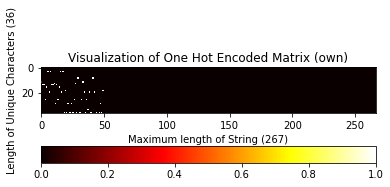

In [32]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(Next_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (36)')
plt.title('Visualization of One Hot Encoded Matrix (own)')
# plt.axis('auto')
plt.show()

In [33]:
# Dimension of the Second OneHotEncoded_matrix
Next_one_hot_encoded_matrix.shape

(37, 267)

From the above figures, we can see that the dimensions are equal for all the strings using `preprocessed` and `smiles_encoder` function.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Apply One Hot encoding using implementation in Scikit-learn

We can use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from SciKit library but it only takes numerical categorical values, hence any value of string type should be [label_encoded](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) before one hot encoded.

In [34]:
# Split the SMILES into characters
def split(stringData):
    """
    Function used to split the strings into Characters array
    Parameters
    ----------
         stringData(string): string
    Returns
    -------
         array: return character array
    """
    return [char for char in stringData]

In [35]:
# Create new column which has OneHotEncoded smiles using sklearn implementation
df['sklearn_OneHotEncoded'] = ''

In [36]:
def laterPadding(matrix):
    """
    Add horizantle and vertical padding to the given matrix
    Parameters
    ----------
          matrix(ndarray): Character array
    Returns
    -------
          ndarray: return padded matrix
  """
    ColumnPadding = np.ndarray(shape=(267-len(matrix),
                               len(matrix[0])))
    ColumnPadding.fill(0)
    IndexPadding = np.ndarray(shape=(267,
                              36-len(matrix[0])))
    IndexPadding.fill(0)
    matrix = np.append(matrix, ColumnPadding, axis=0)
    matrix = np.append(matrix, IndexPadding, axis=1)
    return matrix

In [37]:
# Use Scikit-learn implementation of One Hot Encoding
def sklearn_OneHotEncode(canonical_char):
    """
    Function used to label and One Hot Encode the smiles
    using sklearn LabelEncoder and OneHotEncoder implementation
    Parameters
    ----------
          canonical_char(array): Canonical character array
    Returns
    -------
          ndarray: return one hot encoded matrix
    """
    # integer encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # One Hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

Running the Functions above first give integer encoded SMILES of the labels and finally One Hot encode the SMILES structures.


By default, the OneHotEncoder class will return a more efficient sparse encoding which can be useful in some applications but in this case, we disabled the sparse return type by setting the `sparse=False` argument.

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

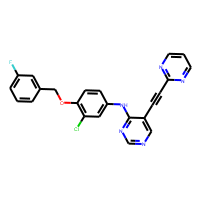
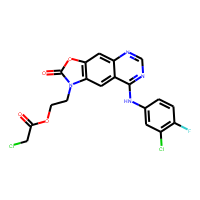
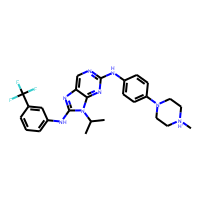
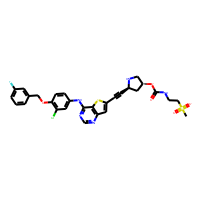
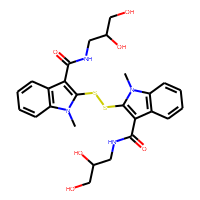

In [38]:
# for loop to iterate over all the smiles in the dataframe
# and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['Processed_canonical_smiles'].iloc[i])
    sklearnOHC = sklearn_OneHotEncode(canonical_char)
    sklearnOHCPadding = laterPadding(sklearnOHC)
    df['sklearn_OneHotEncoded'].iloc[i] = sklearnOHCPadding.transpose()
end = timer()
df.head()

In [39]:
sklearn_time = end - start
print(str(sklearn_time) + ' secs')

10.242503599999992 secs


### Visualization with Matplotlib.imshow() function of One Hot Encoded Matrix using Scikit-learn implementation

In [40]:
# First element of one hot encoded array
First_one_hot_encoded_matrix = df.iloc[0]['sklearn_OneHotEncoded']

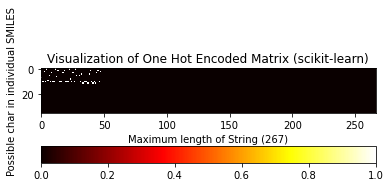

In [41]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Possible char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (scikit-learn)')
# plt.axis('auto')
plt.show()

## Initial Padding

In [42]:
df['sklearn_OneHotEncoded_inner'] = ''

In [43]:
def initialPadding(canonical_char):
    """
    Add Padding to the given list
    Parameters
    ----------
          canonical_char(array): Character array
    Returns
    -------
          list: return padded character list
    """
    zeroes = [0] * (267-len(canonical_char))
    list1 = canonical_char + zeroes
    return list1

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded,sklearn_OneHotEncoded_inner
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

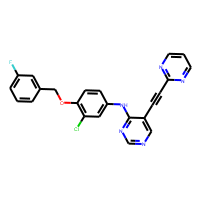
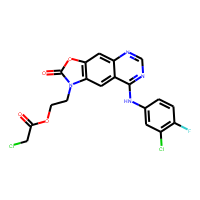
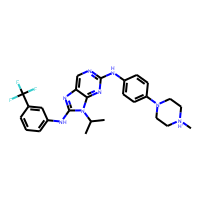
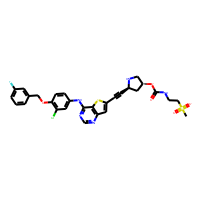
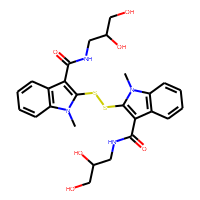

In [44]:
# for loop to iterate over all the smiles in the dataframe
# and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['Processed_canonical_smiles'].iloc[i])
    canonical_charPadded = initialPadding(canonical_char)
    sklearnOHC = sklearn_OneHotEncode(canonical_charPadded)
    IndexPadding = np.ndarray(shape=(267,
                              36-len(sklearnOHC[0])))
    IndexPadding.fill(0)
    sklearnOHC = np.append(sklearnOHC, IndexPadding, axis=1)
    df['sklearn_OneHotEncoded_inner'].iloc[i] = sklearnOHC.transpose()
end = timer()
df.head()

In [45]:
sklearn_time = end - start
print(str(sklearn_time) + ' secs')

17.6919743 secs


In [46]:
First_one_hot_encoded_matrix = df['sklearn_OneHotEncoded_inner'].iloc[0]

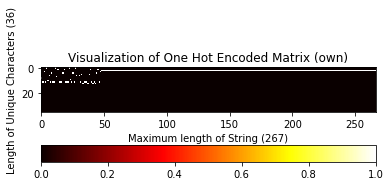

In [47]:
im = plt.imshow(First_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (36)')
plt.title('Visualization of One Hot Encoded Matrix (own)')
# plt.axis('auto')
plt.show()

In [48]:
First_one_hot_encoded_matrix.shape

(36, 267)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Apply One Hot encoding using implementation in Keras

The Keras library offers a function called [to_categorical()](https://keras.io/api/utils/) that we can use to one hot encode data, but it should be integer which may not have a real ordinal relationship and are really just placeholders for labels.

In [49]:
# Create new column which has OneHotEncoded smiles using keras implementation
df['keras_OneHotEncoded'] = ''

In [50]:
# Use keras implementation of One Hot Encoding
def keras_OneHotEncode(canonical_char):
    """
    Function to one hot encode the smiles using keras
    implementation
    Parameters
    ----------
         canonical_char(array): Canonical character array
    Returns
    -------
         ndarray: return one hot encoded matrix
    """
    # integer encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # one hot encode
    encoded = to_categorical(integer_encoded)
    array = laterPadding(encoded)
    return array.transpose()

In [51]:
# for loop to iterate over all the smiles in the
# dataframe and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['canonical_smiles'].iloc[i])
    df['keras_OneHotEncoded'].iloc[i] = keras_OneHotEncode(canonical_char)
end = timer()

,chembl_id,IC50,units,canonical_smiles,pIC50,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded,sklearn_OneHotEncoded_inner,keras_OneHotEncoded
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

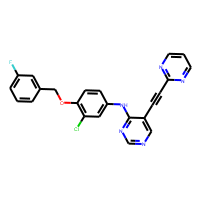
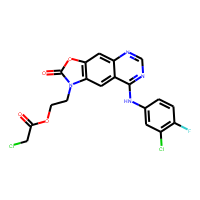
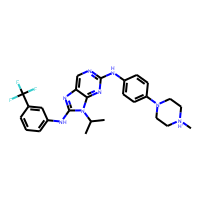
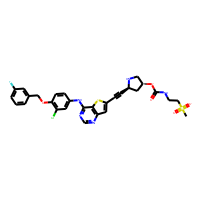
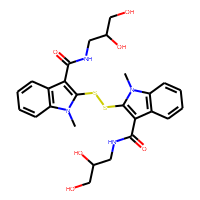

In [52]:
# Get the final dataframe with all the One Hot Encoded Columns
df.head()

In [53]:
keras_time = end - start
print(str(keras_time) + ' secs')

11.5542437 secs


### Visualization with Matplotlib.imshow() function of One Hot Encoded Matrix using keras implementation

In [54]:
# First element of one hot encoded array
First_one_hot_encoded_matrix = df.iloc[0]['keras_OneHotEncoded']

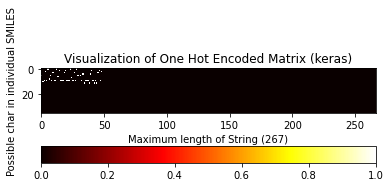

In [55]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_one_hot_encoded_matrix, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Possible char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (keras)')
# plt.axis('auto')
plt.show()

In [56]:
First_one_hot_encoded_matrix.shape

(36, 267)

## Differences for each implementation

In [57]:
print('label')

label


In [58]:
print('label')

label


## Discussion 

## Challenges 

Dimensions equalize
Y = 'Sc' *doubt since S and c both can be present
timit